In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.prompt { min-width:4ex !important; }</style>"))
display(HTML("<style>div#notebook { font-size:14px !important; }</style>"))
pd.options.display.max_rows = 100
pd.options.display.max_columns = None



def make_lag(n, col):
    x = []
    for i in range(0,len(f)-n):
        x = x + [f[col].iloc[i+n]]
    x = x + [None for i in range(0,n)]
    return x


def make_pr(f, b):
    
        l_close = []

        for i in range(0, len(f) - 1):
            pr_open = f['close'].iloc[i]

            for j in range(i + 1, len(f)):
                    if ((f['close'].iloc[j] / pr_open) < (1 - b)):
                        v = [-b]
                        break
                        
                    if ((f['close'].iloc[j] / pr_open) > (1 + b)):
                        v = [b]
                        break
                        
                    v = [None]    
            l_close = l_close + v
                    
                        
        l_close = l_close + [None]

        return l_close
    
def boolean(x):
    if x > 0: return 1
    else: return 0

In [3]:
filenames = ['SBER', 'LKOH', 'MGNT', 'GAZP', 'ROSN']
g = pd.DataFrame()

for fi in filenames:

    f = pd.read_csv('data/'+fi+'.csv', sep = ';')
    #del f['<PER>']
    del f['<TIME>']
    del f['<HIGH>']
    del f['<LOW>']
    #del f['<VOL>']

    f = f.rename(columns = {'<TICKER>':'ticker','<DATE>':'date', "<OPEN>":'open', "<CLOSE>":'close', '<VOL>':'vol'})

    g['date'] = f['date']

    f['close_1'] = make_lag(1,'close')
    g[fi+'_return_1'] = f['close'] / f['close_1'] - 1
    #f['ln_return_1'] = f['return_1'].apply(math.log1p)

    f['close_10'] = make_lag(10,'close')
    g[fi + '_return_10'] = f['close'] / f['close_10'] -1
    #f['ln_return_10'] = f['return_10'].apply(math.log1p)

    f['close_30'] = make_lag(30,'close')
    g[fi + '_return_30'] = f['close'] / f['close_30'] -1
    #f['ln_return_30'] = f['return_30'].apply(math.log1p)

    f['close_50'] = make_lag(50,'close')
    g[fi + '_return_50'] = f['close'] / f['close_50'] -1
    #f['ln_return_50'] = f['return_50'].apply(math.log1p)
    
    
    l = make_pr(f,0.01)
    g[fi+'_return_b_1'] = l
    
    l = make_pr(f,0.025)
    g[fi+'_return_b_30'] = l
    
    l = make_pr(f,0.05)
    g[fi+'_return_b_50'] = l
    
    l = make_pr(f,0.1)
    g[fi+'_return_b_10'] = l
    
    g[fi+'_vol'] = f['vol']
    
    g[fi+'_abs'] = (f['close'] - f['open']).apply(abs) / f['open']
    g[fi+'_movement_1'] = ((f['close'] - f['open']).apply(abs) / f['open'] >= 0.01).apply(boolean)
    g[fi+'_movement_2'] = ((f['close'] - f['open']).apply(abs) / f['open'] >= 0.02).apply(boolean)
    g[fi+'_movement_3'] = ((f['close'] - f['open']).apply(abs) / f['open'] >= 0.03).apply(boolean)
    g[fi+'_movement_5'] = ((f['close'] - f['open']).apply(abs) / f['open'] >= 0.05).apply(boolean)
    
    g[fi+'_movement'] = ((f['close'] - f['open']).apply(abs) / f['open'] >= g[fi+'_abs'].mean()).apply(boolean)


In [4]:
f['week'] = f['date'] // 7
f['week_day'] = f['date'] % 7

In [5]:
g = g.dropna()

In [6]:
    f = g.copy()
    
    for c in filenames:
        for t in ['', 'b_']:
            for i in ['1', '10', '30', '50']:
                
                f[c+'_r_'+t+i] = f[c+'_return_'+t+i].apply(boolean)
                
                
    
    

In [36]:
f.head()

,date,SBER_return_1,SBER_return_10,SBER_return_30,SBER_return_50,SBER_return_b_1,SBER_return_b_30,SBER_return_b_50,SBER_return_b_10,LKOH_return_1,LKOH_return_10,LKOH_return_30,LKOH_return_50,LKOH_return_b_1,LKOH_return_b_30,LKOH_return_b_50,LKOH_return_b_10,MGNT_return_1,MGNT_return_10,MGNT_return_30,MGNT_return_50,MGNT_return_b_1,MGNT_return_b_30,MGNT_return_b_50,MGNT_return_b_10,GAZP_return_1,GAZP_return_10,GAZP_return_30,GAZP_return_50,GAZP_return_b_1,GAZP_return_b_30,GAZP_return_b_50,GAZP_return_b_10,SBER_r_1,SBER_r_10,SBER_r_30,SBER_r_50,SBER_r_b_1,SBER_r_b_10,SBER_r_b_30,SBER_r_b_50,LKOH_r_1,LKOH_r_10,LKOH_r_30,LKOH_r_50,LKOH_r_b_1,LKOH_r_b_10,LKOH_r_b_30,LKOH_r_b_50,GAZP_r_1,GAZP_r_10,GAZP_r_30,GAZP_r_50,GAZP_r_b_1,GAZP_r_b_10,GAZP_r_b_30,GAZP_r_b_50,MGNT_r_1,MGNT_r_10,MGNT_r_30,MGNT_r_50,MGNT_r_b_1,MGNT_r_b_10,MGNT_r_b_30,MGNT_r_b_50
0,20150105,-0.032773,-0.072862,-0.221946,-0.131433,0.01,0.025,0.05,0.1,-0.021322,-0.126945,-0.237542,-0.146777,0.01,0.025,0.05,0.1,-0.050288,-0.133216,-0.164382,-0.059333,0.01,0.025,0.05,0.1,-0.035776,-0.080961,-0.158606,-0.020905,0.01,0.025,0.05,0.1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1
1,20150106,-0.112938,-0.071975,-0.237173,-0.130149,0.01,0.025,0.05,0.1,-0.088258,-0.147892,-0.218333,-0.134686,0.01,0.025,0.05,0.1,-0.021361,-0.122733,-0.116097,-0.045872,0.01,0.025,0.05,0.1,-0.051482,-0.066398,-0.147730,0.021471,0.01,0.025,0.05,0.1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1
2,20150108,0.041204,0.020979,-0.109515,0.010769,-0.01,-0.025,-0.05,0.1,0.045104,-0.087943,-0.141178,-0.040263,-0.01,-0.025,0.05,0.1,0.008063,-0.119553,-0.099407,0.007299,0.01,0.025,0.05,0.1,0.033592,-0.033267,-0.089745,0.088032,-0.01,-0.025,-0.05,0.1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1
3,20150109,0.003180,-0.020946,-0.155853,-0.038110,-0.01,-0.025,0.05,0.1,-0.006459,-0.136188,-0.176923,-0.091781,0.01,0.025,0.05,0.1,-0.013752,-0.102809,-0.106307,-0.023708,0.01,0.025,0.05,0.1,0.010555,-0.072826,-0.103165,0.033175,-0.01,0.025,0.05,0.1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1
4,20150112,0.042945,0.039841,-0.146540,-0.029321,-0.01,-0.025,0.05,0.1,-0.017843,-0.135397,-0.174608,-0.081674,0.01,0.025,0.05,0.1,-0.043918,-0.073744,-0.085394,-0.028273,0.01,0.025,0.05,0.1,-0.016966,-0.052568,-0.095296,0.039437,0.01,0.025,0.05,0.1,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1


In [7]:
f.to_excel('data/market_data.xlsx')

In [45]:
f.columns

Index(['date', 'SBER_return_1', 'SBER_return_10', 'SBER_return_30',
       'SBER_return_50', 'SBER_return_b_1', 'SBER_return_b_30',
       'SBER_return_b_50', 'SBER_return_b_10', 'SBER_vol', 'LKOH_return_1',
       'LKOH_return_10', 'LKOH_return_30', 'LKOH_return_50', 'LKOH_return_b_1',
       'LKOH_return_b_30', 'LKOH_return_b_50', 'LKOH_return_b_10', 'LKOH_vol',
       'MTSS_return_1', 'MTSS_return_10', 'MTSS_return_30', 'MTSS_return_50',
       'MTSS_return_b_1', 'MTSS_return_b_30', 'MTSS_return_b_50',
       'MTSS_return_b_10', 'MTSS_vol', 'GAZP_return_1', 'GAZP_return_10',
       'GAZP_return_30', 'GAZP_return_50', 'GAZP_return_b_1',
       'GAZP_return_b_30', 'GAZP_return_b_50', 'GAZP_return_b_10', 'GAZP_vol',
       'ROSN_return_1', 'ROSN_return_10', 'ROSN_return_30', 'ROSN_return_50',
       'ROSN_return_b_1', 'ROSN_return_b_30', 'ROSN_return_b_50',
       'ROSN_return_b_10', 'ROSN_vol', 'SBER_r_1', 'SBER_r_10', 'SBER_r_30',
       'SBER_r_50', 'SBER_r_b_1', 'SBER_r_b_10', 'SBE

In [19]:
f.to_excel('sber.xlsx')

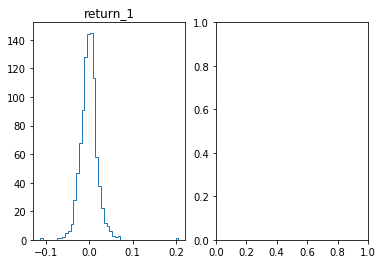

In [39]:
fig, ax = plt.subplots(1,2)

ax[0].hist(f['SBER_return_1'].dropna(), bins=50, histtype = 'step')
ax[0].set_title('return_1')

#ax[1].hist(f['ln_return_1'].dropna(), bins=50, histtype = 'step')
#ax[1].set_title('ln_return_1')

plt.show()

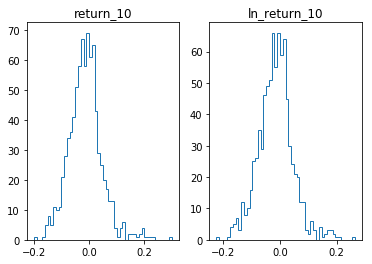

In [5]:
fig, ax = plt.subplots(1,2)

ax[0].hist(f['return_10'].dropna(), bins=50, histtype = 'step')
ax[0].set_title('return_10')

ax[1].hist(f['ln_return_10'].dropna(), bins=50, histtype = 'step')
ax[1].set_title('ln_return_10')

plt.show()

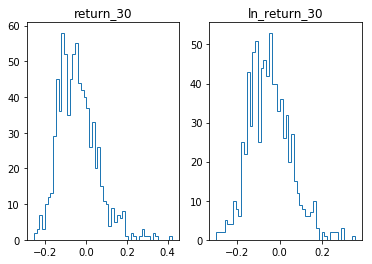

In [6]:
fig, ax = plt.subplots(1,2)

ax[0].hist(f['return_30'].dropna(), bins=50, histtype = 'step')
ax[0].set_title('return_30')

ax[1].hist(f['ln_return_30'].dropna(), bins=50, histtype = 'step')
ax[1].set_title('ln_return_30')

plt.show()

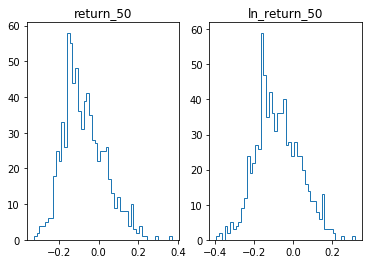

In [7]:
fig, ax = plt.subplots(1,2)

ax[0].hist(f['return_50'].dropna(), bins=50, histtype = 'step')
ax[0].set_title('return_50')

ax[1].hist(f['ln_return_50'].dropna(), bins=50, histtype = 'step')
ax[1].set_title('ln_return_50')

plt.show()

In [17]:
sum(f['ln_return_50'].dropna())

-64.407576429637061

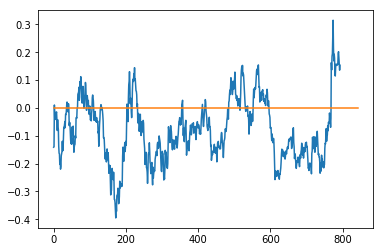

In [16]:
plt.plot(f['ln_return_50'].dropna())
plt.plot([0 for x in range(0,len(f))])
plt.show()

In [328]:
f['b_30'] = f['ln_return_30'] < 0
f['b_1'] = f['ln_return_1'] < 0
f['b_10'] = f['ln_return_10'] < 0
f['b_50'] = f['ln_return_50'] < 0

In [315]:
print len(f)

844


In [316]:
print sum(f['b_1'])
print len(f['b_1'].dropna())

443
844


In [317]:
print sum(f['b_30']) - 30
print len(f['b_30']) - 30

549
814


In [318]:
print sum(f['b_50']) - 50
print len(f['b_50']) - 50

550
794


In [329]:
g_ = f[['date', 'b_1']]

# Новости

In [330]:
f = pd.read_excel('texts_3.xlsx')
g = pd.read_excel('res_3.xlsx')
f = f.merge(g, on = ['url'])
#f['step'] = pd.to_datetime(f['step'])
f['date'] = f['step'].str.replace(u'-','').astype(int)
f = f.merge(g_, on = ['date'])

In [331]:
print len(f)
f.head()

3683


,artical_subheader,article_header,authors,text,url,error,step,time,date,b_1
0,Мониторинг капвложений,Прямые иностранные инвестиции снова утекают из РФ,Алексей Шаповалов,ЦБ опубликовал часть подробной статистики пото...,/doc/3598321,NaN,2018-04-09,60.958,20180409,True
1,Проект о спасении страховщиков готов ко втором...,Санация как возмездие,Татьяна Гришина,"Завтра Госдума рассмотрит во втором, основном ...",/doc/3598315,NaN,2018-04-09,60.962,20180409,True
2,Вклад цифровизации в ВВП плохо отражается в ст...,Аршином цифру не измерить,Надежда Краснушкина,Массовое проникновение информационных технолог...,/doc/3598313,NaN,2018-04-09,60.966,20180409,True
3,"Ведомства все еще пытаются понять, кто такие с...",Предпринимателей отделят от ремесленников,Дарья Николаева,Внесенный в Госдуму минфиновский законопроект ...,/doc/3598291,NaN,2018-04-09,60.970,20180409,True
4,"Дмитрий Бутрин — о том, что может скрываться з...",Взнос дороже денег,NaN,"За небольшими трендами, которые сами по себе в...",/doc/3594221,NaN,2018-04-09,60.974,20180409,True


In [332]:
d = [u'сбербанк']
def find(x):
    for y in d:
        if x.lower().find(y) != -1: return True
    return False

f['b'] = f['text'].fillna('').apply(find)

In [299]:
f_.head()

,index,artical_subheader,article_header,authors,text,url,error,step,time,date,b_30,b
0,21,Мониторинг государственных финансов,Регионы стали нетто-кредиторами финансового рынка,Вадим Вислогузов,"Субъекты РФ в 2017 году заработали 99,4 млрд р...",/doc/3600279,NaN,2018-04-12,62.844,20180412,False,True
1,27,Андрей Райский о незавидной судьбе госкорпорац...,Публичное — враг третейского,NaN,"За последние месяцы мы много писали о том, как...",/doc/3599856,NaN,2018-04-13,63.396,20180413,False,True
2,44,Участники рынка мечтают об отсрочке новых правил,Госзакупки испытывают на растяжение,"Дарья Николаева, Олег Сапожков",Перевод госзакупок и закупок госкомпаний у мал...,/doc/3606317,NaN,2018-04-18,66.320,20180418,False,True
3,61,Экс-председатель ЦБ РФ Сергей Дубинин — о перс...,"«Не вижу причин, чтобы курс просел»",Беседовала Светлана Сухова,"В какой мере девальвация рубля, вызванная очер...",/doc/3592334,NaN,2018-04-23,69.356,20180423,False,True
4,66,Правительство утвердило перечень мероприятий п...,Плюс энергоэффективность всей страны,Евгения Крючкова,План повышения энергоэффективности экономики Р...,/doc/3612707,NaN,2018-04-24,70.195,20180424,False,True


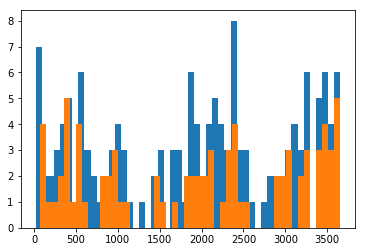

In [338]:
plt.hist(f_['index'], bins = 50)
plt.hist(f_[f_['b_1']]['index'], bins = 50)
plt.show()

# Обработка текста

In [344]:
w = []
print len(f_)

for i in range(0,len(f_)):
    y = f_['text'].iloc[i]
    y = y.lower().split(' ')
    for x in y:
        w = w + [x]
        
    print '\r', i,

149
57                                

KeyboardInterrupt: 

In [346]:
len(w)

50644

In [348]:
for i in range(0,100):
    print w[i]

субъекты
рф
в
2017
году
заработали
99,4 млрд
руб.
на
процентах
по
банковским
депозитам,
потратив
при
этом
110,1 млрд
руб.
на
выплату
процентов
по
долгу,
указывает
агентство
акра
в
своем
новом
исследовании.
дополнительно
заработали
на
депозитах
12
субъектов
рф,
на
долю
москвы
пришлось
75%
этих
доходов.
поясним,
что
относительно
благополучные
регионы
рф
размещают
в
банках
профициты
прошлых
лет,
внутригодовой
кассовый
профицит
и
свободные
остатки
на
счетах
предприятий
госсектора.
всего
доходы
по
банковским
депозитам
превысили
расходы
на
обслуживание
долга
у
девяти
российских
регионов
(в
частности,
у
москвы,
московской
области,
башкирии
и
хмао).
в
целом
объем
банковских
депозитов
региональных
властей
(1,122 трлн
руб.
на
1


In [355]:
t = pd.DataFrame(w)[0].value_counts()

In [360]:
t

в                  1962
и                  1247
на                  995
—                   690
не                  625
                    623
по                  588
с                   508
что                 487
к                   254
а                   247
для                 240
как                 240
это                 221
за                  211
о                   205
но                  193
из                  192
у                   192
от                  172
его                 142
года                141
их                  141
уже                 137
до                  136
мы                  133
при                 132
будет               131
году                127
руб.                124
то                  105
все                 100
есть                 99
если                 98
еще                  94
или                  92
более                88
2015                 83
они                  83
же                   82
только               81
он              